In [1]:
from src import data_loader, features, model, evaluate, utils
import yaml

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [2]:
config = yaml.safe_load(open('config/config.yaml'))

In [3]:
# Raw df
df_raw = config['data']['raw_path']
df_raw = data_loader.load_data(df_raw)


# Clean df
df_clean = config['data']['clean_path']

# Data cleaning

In [4]:
# Replacing redundant values "?" in columns
col_item={
    'workclass': 'Private',
    'occupation': 'Prof-specialty',
    'native-country': 'United-States',
}

df = data_loader.clean_data.replace(df_raw, "?", col_item)


### Re-mapping column values

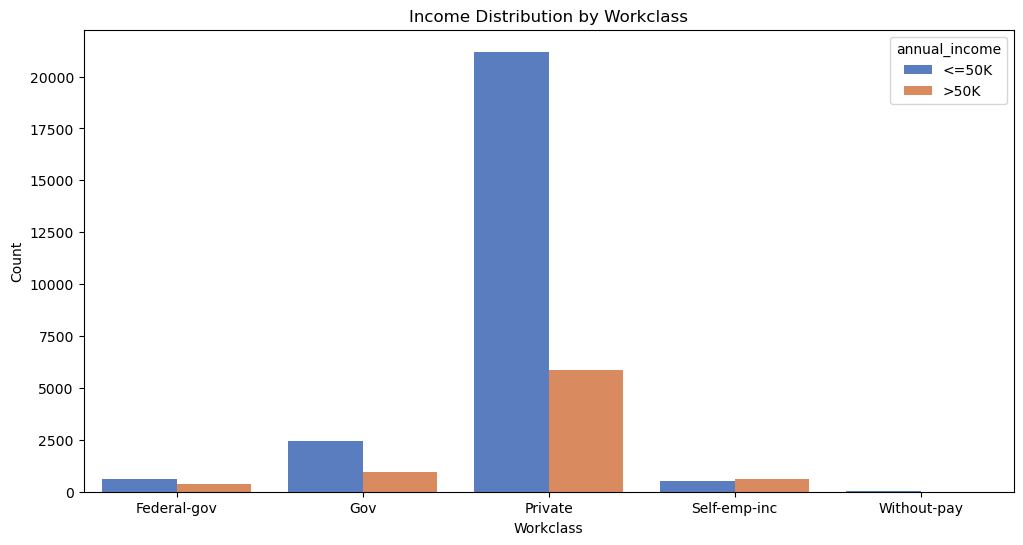

In [5]:
# Re-mapping - workclass
map = {
    'Never-worked': 'Without-pay', 
    'State-gov': 'Gov', 
    'Local-gov': 'Gov', 
    'Self-emp-not-inc': 'Private', 
}

df = data_loader.clean_data.category_mapping(df, 'workclass', map)

# Plot
utils.income_impact(df, 'workclass')

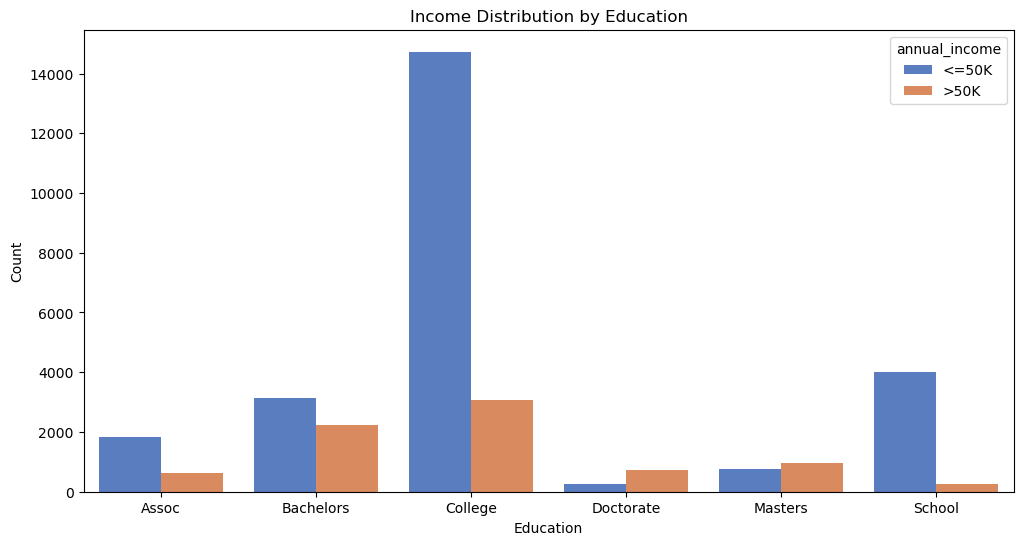

In [6]:
# Re-mapping - education
map = {
    '10th': 'School',
    '11th': 'School',
    '12th': 'School',
    '1st-4th': 'School',
    '5th-6th': 'School',
    '7th-8th': 'School',
    '9th': 'School',
    'Preschool': 'School',
    'Doctorate': 'Doctorate',
    'Prof-school': 'Doctorate',
    'Assoc-acdm': 'Assoc',
    'Assoc-voc': 'Assoc',
    'HS-grad': 'College',
    'Some-college': 'College',
}

df = data_loader.clean_data.category_mapping(df, 'education', map)

# Plot
utils.income_impact(df, 'education')

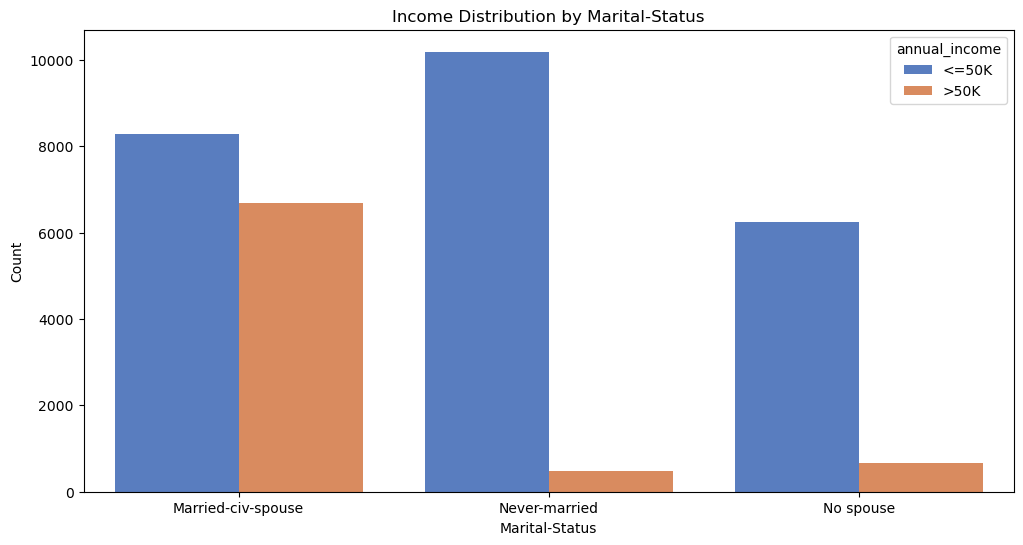

In [7]:
# Re-mapping - marital-status
map={
    'Divorced': 'No spouse',
    'Married-spouse-absent': 'No spouse',
    'Separated': 'No spouse',
    'Widowed': 'No spouse',
    'Married-AF-spouse': 'No spouse',
}

df = data_loader.clean_data.category_mapping(df, 'marital-status', map)

# Plot
utils.income_impact(df, 'marital-status')

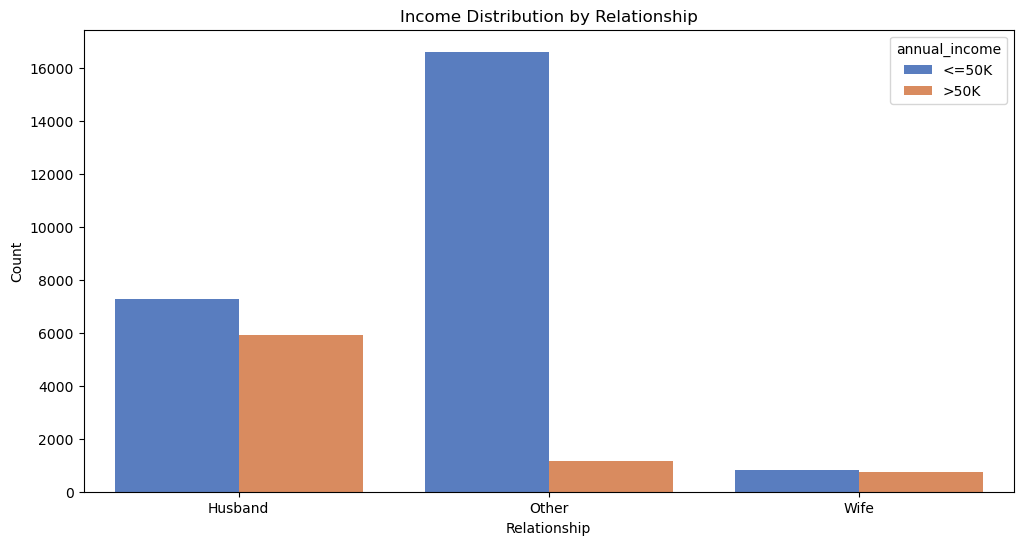

In [8]:
# Re-mapping - relationship
map={
    'Not-in-family': 'Other',
    'Own-child': 'Other',
    'Unmarried': 'Other',
    'Other-relative': 'Other',
}

df = data_loader.clean_data.category_mapping(df, 'relationship', map)

# Plot
utils.income_impact(df, 'relationship')

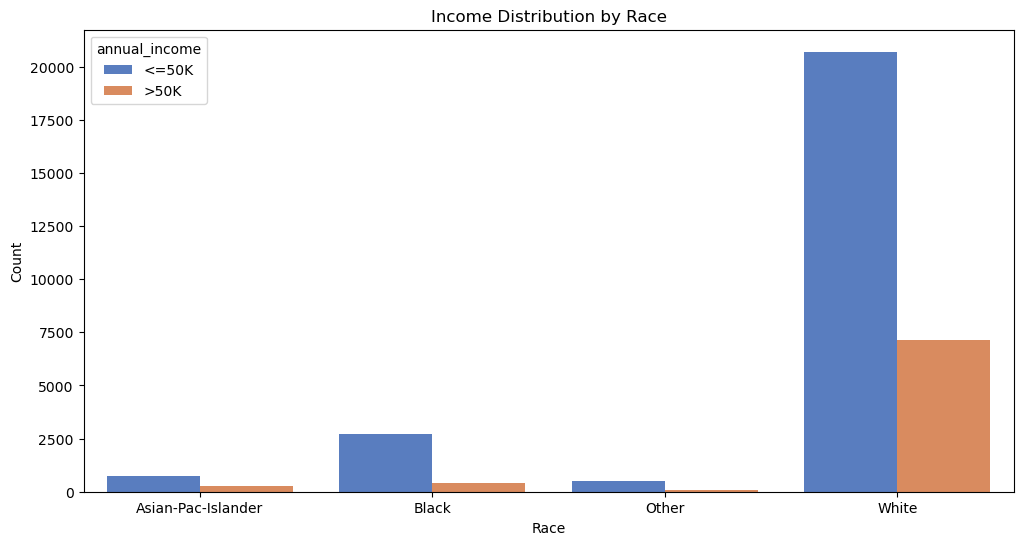

In [9]:
# Re-mapping - race
map={
    'Amer-Indian-Eskimo': 'Other',
    'Other': 'Other',
}

df = data_loader.clean_data.category_mapping(df, 'race', map)

# Plot
utils.income_impact(df, 'race')

# Saving, Loading cleaned file

In [10]:
df.to_csv('data/clean/census-income_clean.csv', index=False)

In [11]:
df = data_loader.load_data(df_clean)

# Pre-Processing

### Outlier detection

Text(0.5, 1.0, 'annual_income')

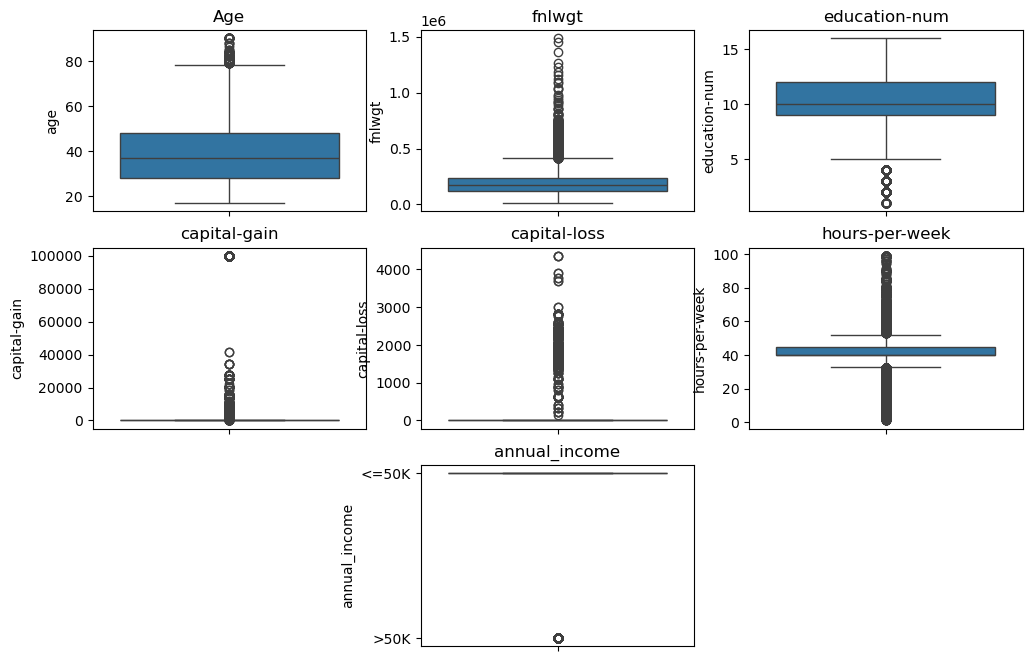

In [12]:
# Outlier Detection - plot
plt.figure(figsize=(12,8))

    # age
plt.subplot(3,3,1)
sns.boxplot(df['age'])
plt.title('Age')

    # fnlwgt
plt.subplot(3,3,2)
sns.boxplot(df['fnlwgt'])
plt.title('fnlwgt')

    # education_num
plt.subplot(3,3,3)
sns.boxplot(df['education-num'])
plt.title('education-num')

    # capital_gain
plt.subplot(3,3,4)
sns.boxplot(df['capital-gain'])
plt.title('capital-gain')

    # capital_loss
plt.subplot(3,3,5)
sns.boxplot(df['capital-loss'])
plt.title('capital-loss')

    # hours-per-week
plt.subplot(3,3,6)
sns.boxplot(df['hours-per-week'])
plt.title('hours-per-week')

    # annual_income
plt.subplot(3,3,8)
sns.boxplot(df['annual_income'])
plt.title('annual_income')

### z-scores

In [13]:
# z-score - all numerical columns
df_z_scores = df.select_dtypes(include='number').apply(zscore)

# Merging z-scores with df:
df_z = pd.concat([df, df_z_scores.add_suffix('_z')], axis=1)

In [14]:
df_z_field_based = pd.DataFrame(df_z[['age','age_z']])
df_z_field_based

,age,age_z
0,39,0.030671
1,50,0.837109
2,38,-0.042642
3,53,1.057047
4,28,-0.775768
...,...,...
32556,27,-0.849080
32557,40,0.103983
32558,58,1.423610
32559,22,-1.215643


In [15]:
df_z.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,age_z,fnlwgt_z,education-num_z,capital-gain_z,capital-loss_z,hours-per-week_z
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,-2.705915e-17,-1.001625e-16,1.471887e-16,1.309314e-17,1.016900e-16,-1.549355e-17
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,-1.582206e+00,-1.681631e+00,-3.529656e+00,-1.459205e-01,-2.166595e-01,-3.194030e+00
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,-7.757679e-01,-6.816910e-01,-4.200596e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,-1.159546e-01,-1.082193e-01,-3.136003e-02,-1.459205e-01,-2.166595e-01,-3.542945e-02
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,6.904838e-01,4.478765e-01,7.460392e-01,-1.459205e-01,-2.166595e-01,3.695194e-01
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,3.769612e+00,1.226856e+01,2.300838e+00,1.339458e+01,1.059351e+01,4.742967e+00


OBSERVATIONS:

After calculating the number of rows containing outliers, we find that we would lose large data values if we remove the outliers. 

Since our dataset is already imbalanced, losing this number of rows with further increase the imbalance, and would be a significant loss if we consider the rows with income higher than 50K$.

Hence we continue with the outliers and keep the rows

### Skewness treatment

In [16]:
# Raw skewness
df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].skew()

age                0.558743
fnlwgt             1.446980
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64

In [17]:
# sqrt transformation for fngwlt
df['fnlwgt'] = np.sqrt(df['fnlwgt'])
df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].skew()

age                0.558743
fnlwgt             0.189115
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64

In [18]:
# cbrt transformation for capital-gain and capital-loss
df['capital-gain'] = np.cbrt(df['capital-gain'])
df['capital-loss'] = np.cbrt(df['capital-loss'])
df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].skew()

age               0.558743
fnlwgt            0.189115
education-num    -0.311676
capital-gain      4.099578
capital-loss      4.337076
hours-per-week    0.227643
dtype: float64

Values are still high for capital-gain and capital-loss;

 we will transform them again

In [19]:
# 2nd cbrt transformation for capital-gain and capital-loss
df['capital-gain'] = np.cbrt(df['capital-gain'])
df['capital-loss'] = np.cbrt(df['capital-loss'])
df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].skew()

age               0.558743
fnlwgt            0.189115
education-num    -0.311676
capital-gain      3.102517
capital-loss      4.304769
hours-per-week    0.227643
dtype: float64

The skewness does not further reduce - we continue with this data.

### Encoding data

In [20]:
encode_list = ['workclass', 
               'education', 
               'marital-status', 
               'occupation', 
               'relationship', 
               'native-country', 
               'race', 
               'sex', 
               'annual_income'
]

features.encode_features(df, encode_list)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,1,278.416954,1,13,1,0,1,3,1,2.348587,0.0,40,38,0
1,50,2,288.636450,1,13,0,3,0,3,1,0.000000,0.0,13,38,0
2,38,2,464.377002,2,9,2,5,1,3,1,0.000000,0.0,40,38,0
3,53,2,484.480134,5,7,0,5,0,1,1,0.000000,0.0,40,38,0
4,28,2,581.729318,1,13,0,9,2,1,0,0.000000,0.0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,507.249446,0,12,0,12,2,3,0,0.000000,0.0,38,38,0
32557,40,2,392.904569,2,9,0,6,0,3,1,0.000000,0.0,40,38,1
32558,58,2,389.756334,2,9,2,0,1,3,0,0.000000,0.0,40,38,0
32559,22,2,448.876375,2,9,1,0,1,3,1,0.000000,0.0,20,38,0


### Target feature selection, Scaling, Train-Test split

In [21]:
# Dividing dataset into Independent and Dependent data before scaling
ds_x = df.drop('annual_income', axis='columns')
# y = df['annual_income']

In [22]:
# Scaling ds_x
data_x = features.scale_features(ds_x)

In [23]:
# Target feature selection
X = pd.DataFrame(data_x, columns=ds_x.columns)
y = df['annual_income']

In [24]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)
print("\n")
print(y_train.shape)
print(y_test.shape)

(22792, 14)
(9769, 14)


(22792,)
(9769,)


# Logistic Regression

In [25]:
# Logistic Regression model
model_type = config['models']['logistic_regressor']
model_obj = model.build_model(model_type['type'], model_type['params'])
model.train_model(model_obj, X_train, y_train)

LogisticRegression()

In [26]:
evaluate.evaluate(model_obj, X_test, y_test)

LogisticRegression()

[[6868  539]
 [1092 1270]]

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7407
           1       0.70      0.54      0.61      2362

    accuracy                           0.83      9769
   macro avg       0.78      0.73      0.75      9769
weighted avg       0.82      0.83      0.82      9769


Specificity: 0.93

Total support: 9769.00



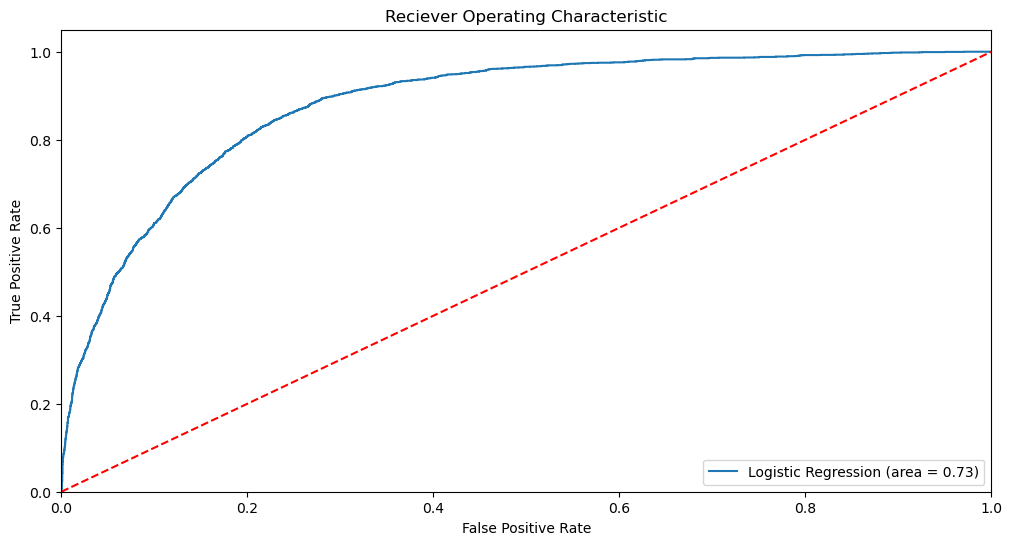

In [27]:
evaluate.roc(model_obj, X_test, y_test)

# Random Forest

In [28]:
# Random Forest Classifier model
model_type = config['models']['random_forest']
model_obj = model.build_model(model_type['type'], model_type['params'])
model.train_model(model_obj, X_train, y_train)

RandomForestClassifier(max_depth=10)

In [29]:
evaluate.evaluate(model_obj, X_test, y_test)

RandomForestClassifier(max_depth=10)

[[7055  352]
 [1018 1344]]

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7407
           1       0.79      0.57      0.66      2362

    accuracy                           0.86      9769
   macro avg       0.83      0.76      0.79      9769
weighted avg       0.85      0.86      0.85      9769


Specificity: 0.95

Total support: 9769.00



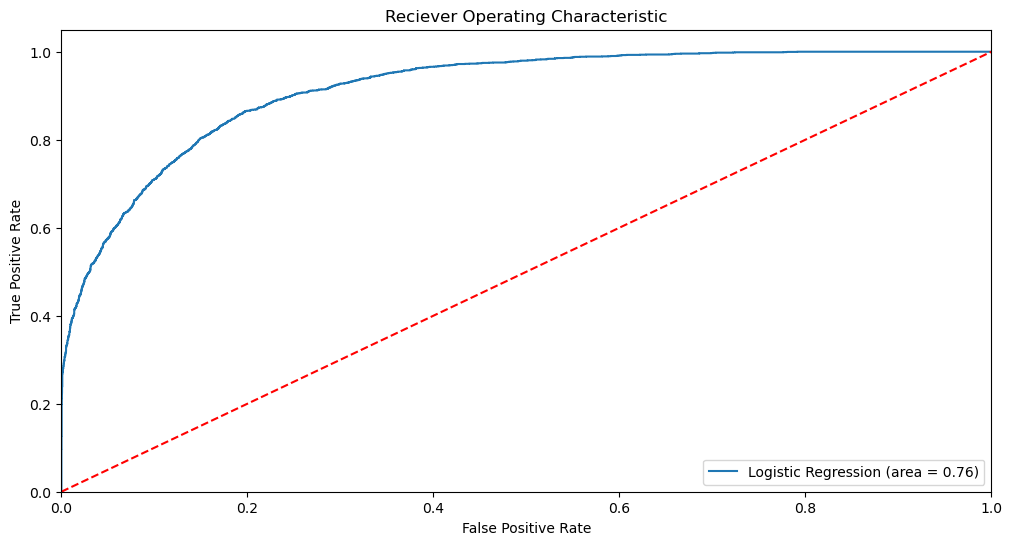

In [30]:
evaluate.roc(model_obj, X_test, y_test)